Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, precision_score, recall_score
from sklearn.model_selection import  StratifiedKFold


get data

In [2]:
dataTomClancy  = pd.read_csv('./rs6_clean.csv')
dataTomClancy.shape

(5035, 11)

In [3]:
dataTomClancy.head(2)

,Unnamed: 0,player_name,kills,deaths,wins,losess,xp,headshots,melee_kills,games_played,time_played
0,0,imBrendyn,39693,27208,3963,2524,87180363,16789,336,6487,2105
1,1,bestboy021,52978,31853,6332,2716,111206504,18196,1204,9048,2440


propreter des data

In [4]:
colonnes = ['kills', 'deaths', 'losess', 'xp', 'headshots', 'melee_kills', 'games_played', 'time_played','wins']
GoodDataTomClancy = dataTomClancy[colonnes]
GoodDataTomClancy.head(3)

,kills,deaths,losess,xp,headshots,melee_kills,games_played,time_played,wins
0,39693,27208,2524,87180363,16789,336,6487,2105,3963
1,52978,31853,2716,111206504,18196,1204,9048,2440,6332
2,32141,31353,2892,89109230,12652,564,7417,2184,4525


test data

In [5]:
max_values = GoodDataTomClancy.max()
print("Valeurs maximales pour chaque colonne :")
print(max_values)

Valeurs maximales pour chaque colonne :
kills               86396
deaths              82231
losess              17403
xp              235629835
headshots           34098
melee_kills          2393
games_played        22904
time_played          5686
wins                13678
dtype: int64


In [6]:
mediane_wins = GoodDataTomClancy['wins'].median()
print(f"\nMédiane de 'wins': {mediane_wins}")


Médiane de 'wins': 2286.0


In [7]:

au_dessus_mediane = dataTomClancy[dataTomClancy['wins'] > mediane_wins]
print(f"\nMédiane de 'wins' au_dessus_mediane")
au_dessus_mediane.shape



Médiane de 'wins' au_dessus_mediane


(2516, 11)

In [8]:
en_dessous_mediane = dataTomClancy[dataTomClancy['wins'] <= mediane_wins]
print(f"\nMédiane de 'wins' en_dessous_mediane")
en_dessous_mediane.shape


Médiane de 'wins' en_dessous_mediane


(2519, 11)

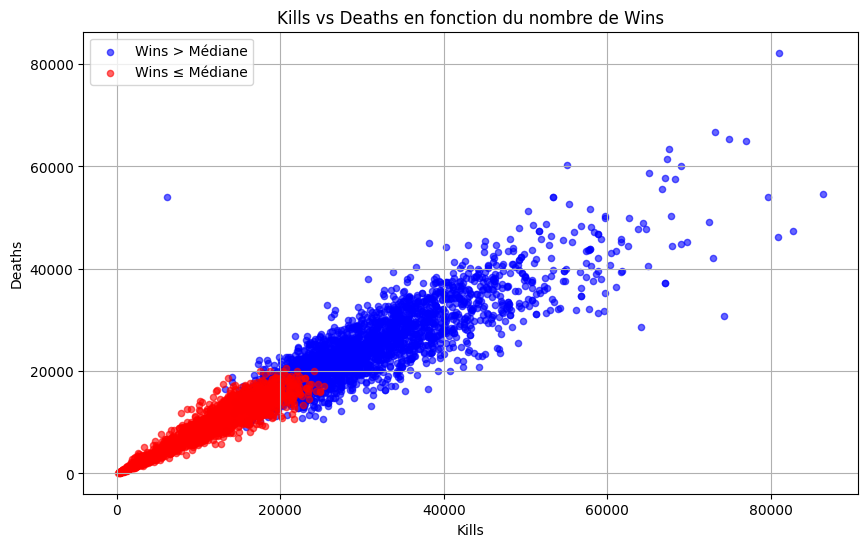

In [9]:
colors = {True: 'blue', False: 'red'}

fig, ax = plt.subplots(figsize=(10, 6))

for key, condition in [(True, dataTomClancy['wins'] > mediane_wins),
                       (False, dataTomClancy['wins'] <= mediane_wins)]:
    subset = dataTomClancy[condition] 
    subset.plot(
        ax=ax,
        kind='scatter',
        x='kills',
        y='deaths',
        label='Wins > Médiane' if key else 'Wins ≤ Médiane',
        color=colors[key],
        alpha=0.6
    )

plt.xlabel('Kills')
plt.ylabel('Deaths')
plt.title('Kills vs Deaths en fonction du nombre de Wins')
plt.legend()
plt.grid(True)
plt.show()

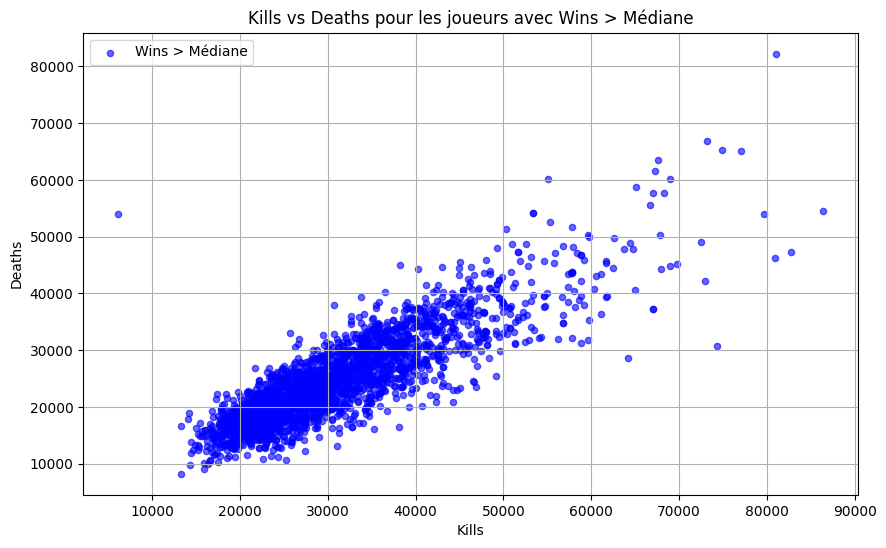

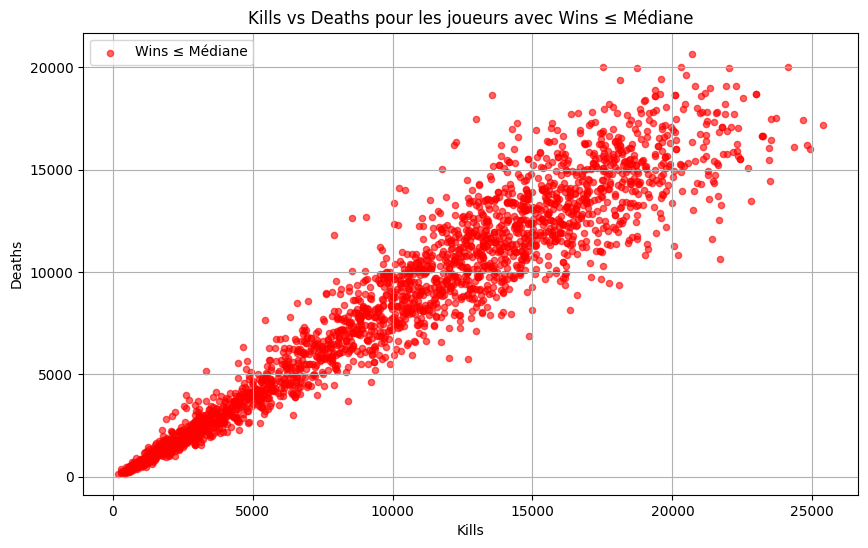

In [10]:
groups = [
    (au_dessus_mediane, 'Wins > Médiane', 'blue', 'Kills vs Deaths pour les joueurs avec Wins > Médiane'),
    (en_dessous_mediane, 'Wins ≤ Médiane', 'red', 'Kills vs Deaths pour les joueurs avec Wins ≤ Médiane')
]


for data, label, color, title in groups:
    fig, ax = plt.subplots(figsize=(10, 6))
    data.plot(
        ax=ax,
        kind='scatter',
        x='kills',
        y='deaths',
        label=label,
        color=color,
        alpha=0.6
    )
    plt.xlabel('Kills')
    plt.ylabel('Deaths')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

Corrélation des autres variables avec 'wins':
wins            1.000000
games_played    0.980924
time_played     0.967955
xp              0.967797
kills           0.966041
headshots       0.942601
deaths          0.937343
losess          0.889367
melee_kills     0.733176
Name: wins, dtype: float64


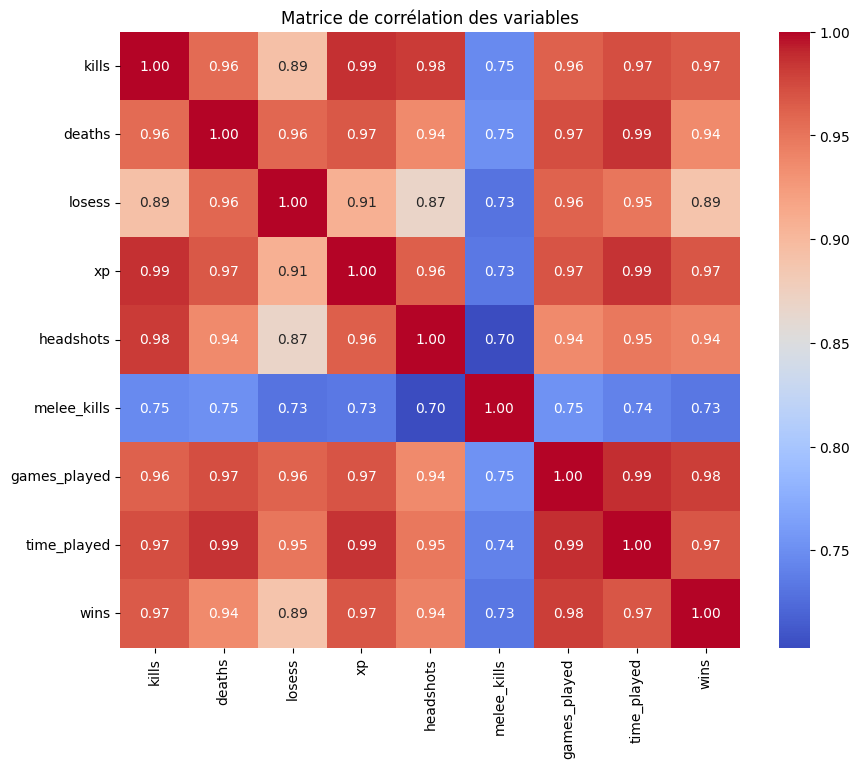

In [11]:
correlation_matrix = GoodDataTomClancy.corr()

correlation_with_wins = correlation_matrix['wins'].sort_values(ascending=False)
print("Corrélation des autres variables avec 'wins':")
print(correlation_with_wins)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matrice de corrélation des variables')
plt.show()

| Rang | Variable       | Corrélation avec `wins` | > 75% |
|------|----------------|-------------------------|-------|
| 1    | Kills         | 0.97                    | ✅    |
| 1    | XP            | 0.97                    | ✅    |
| 1    | Time Played   | 0.97                    | ✅    |
| 4    | Deaths        | 0.94                    | ✅    |
| 4    | Headshots     | 0.94                    | ✅    |
| 6    | Games Played  | 0.98                    | ✅    |
| 7    | Losess        | 0.89                    | ✅    |
| 8    | Melee Kills   | 0.73                    | ❌    |


1 Échantillon aléatoire : Nous prenons un échantillon aléatoire de 100 valeurs
2 Boucle pour chaque variable


In [12]:
variables = ['kills', 'deaths', 'losess', 'xp', 'headshots', 'games_played', 'time_played','wins']
GoodDataTomClancy =GoodDataTomClancy[variables]

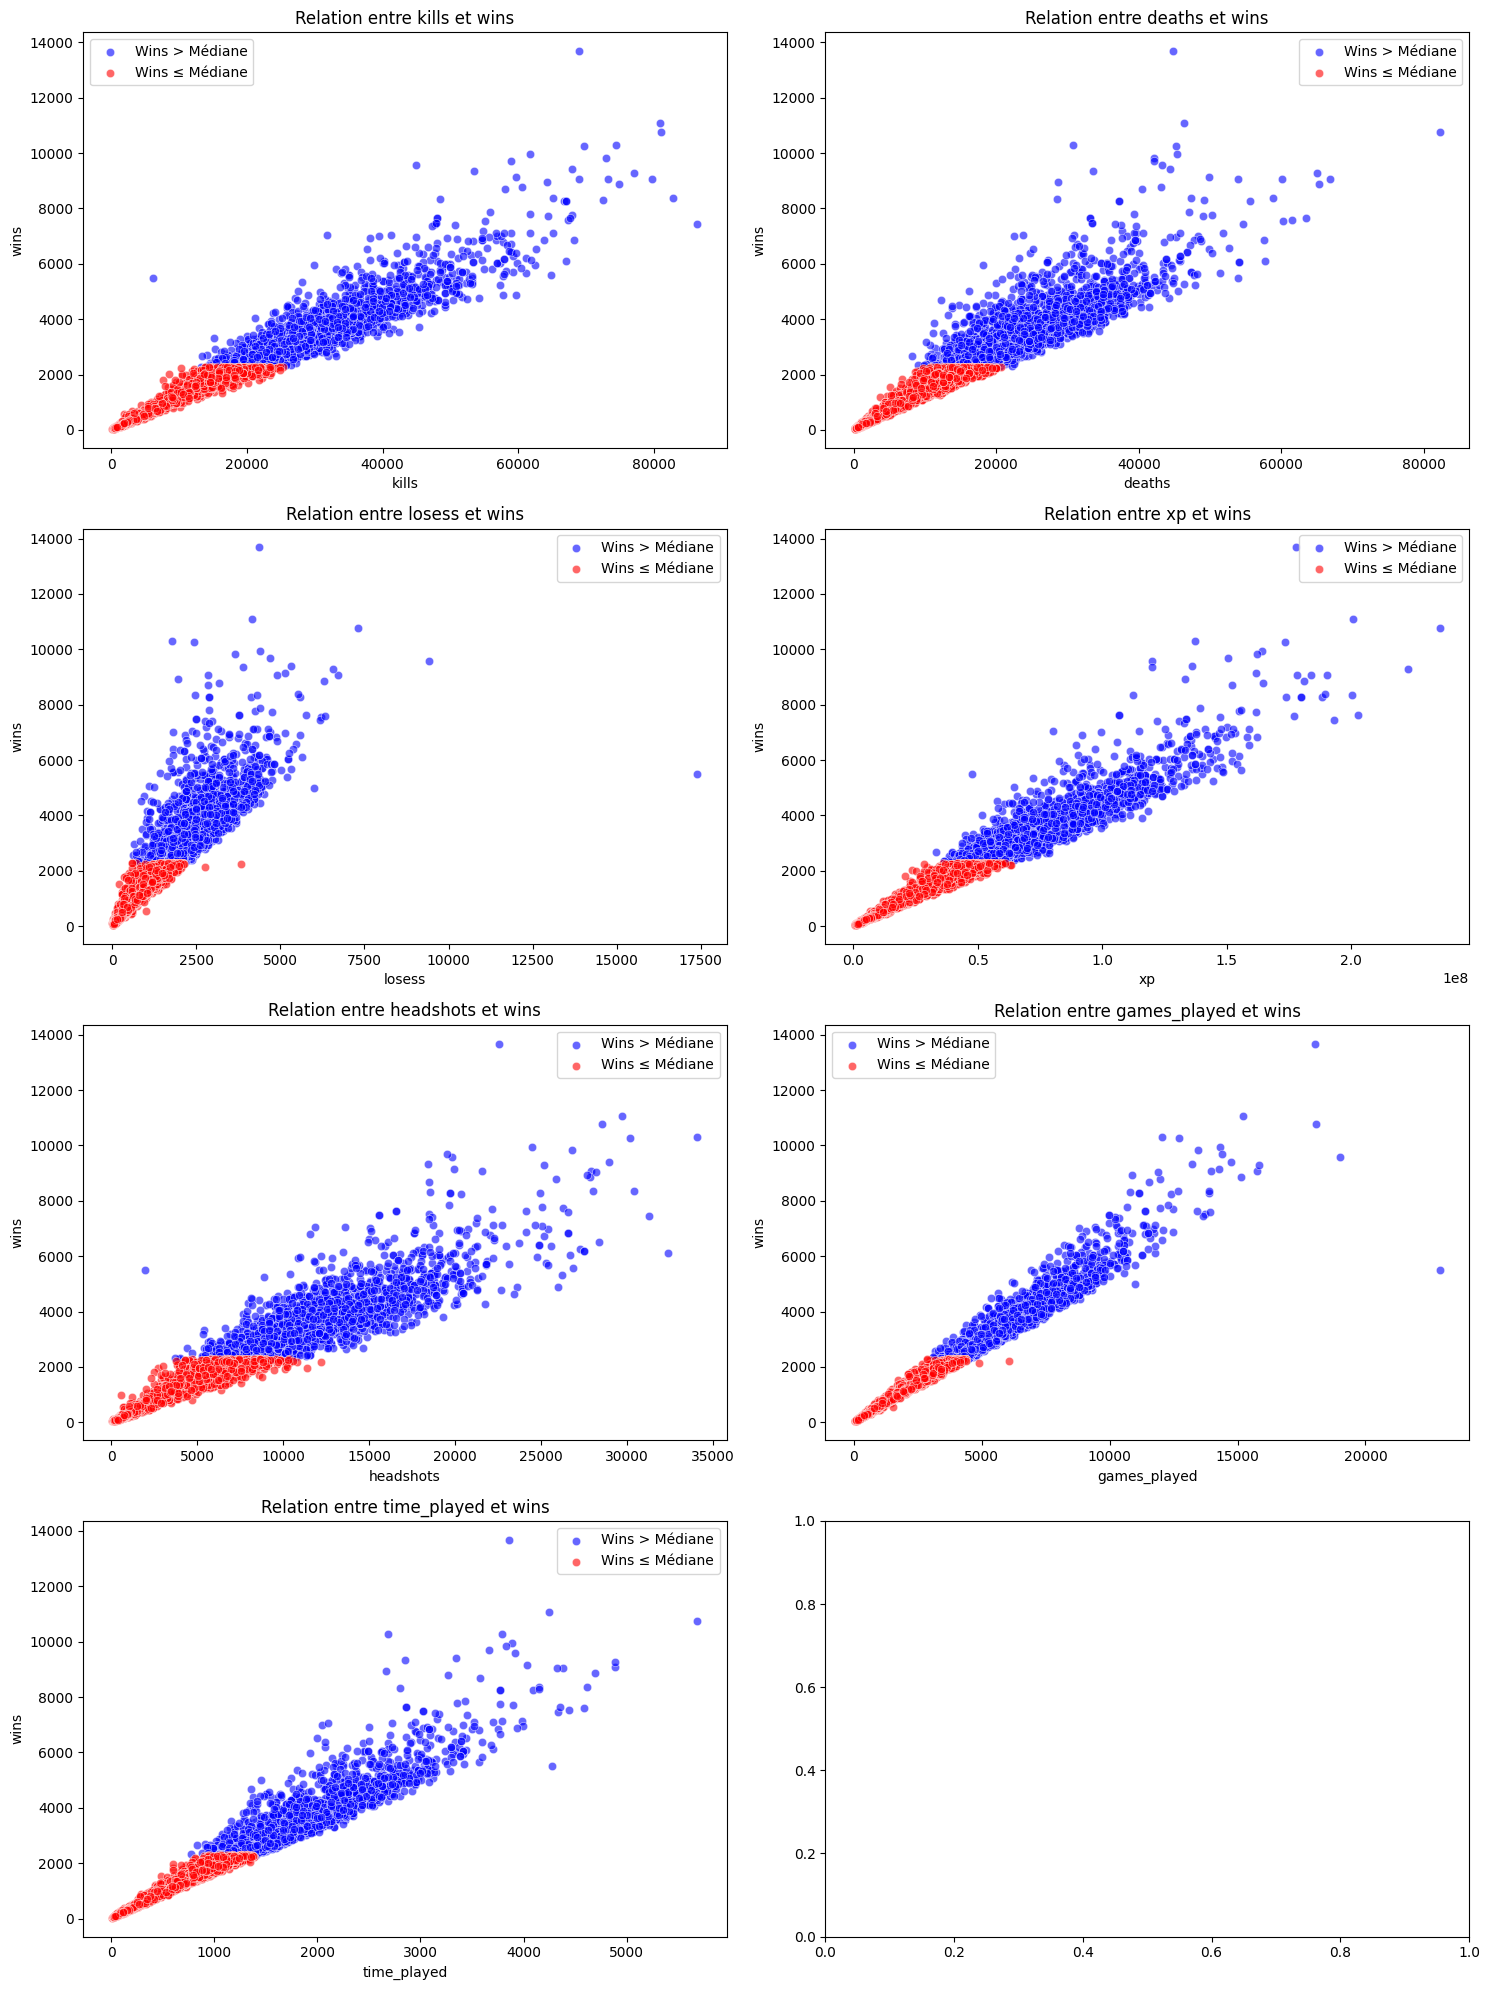

In [13]:

variables = ['kills', 'deaths', 'losess', 'xp', 'headshots', 'games_played', 'time_played']

fig, axes = plt.subplots(4, 2, figsize=(15, 20))
axes = axes.flatten()

for i, var in enumerate(variables):
    for key, condition in [(True, GoodDataTomClancy['wins'] > mediane_wins), 
                           (False, GoodDataTomClancy['wins'] <= mediane_wins)]:
        subset = GoodDataTomClancy[condition]
        color = 'blue' if key else 'red'
        label = 'Wins > Médiane' if key else 'Wins ≤ Médiane'
        sns.scatterplot(x=var, y='wins', data=subset, ax=axes[i], color=color, label=label, alpha=0.6)
    
    axes[i].set_title(f'Relation entre {var} et wins')
    axes[i].legend()

plt.tight_layout()
plt.show()

In [14]:
GoodDataTomClancy.head(3)

,kills,deaths,losess,xp,headshots,games_played,time_played,wins
0,39693,27208,2524,87180363,16789,6487,2105,3963
1,52978,31853,2716,111206504,18196,9048,2440,6332
2,32141,31353,2892,89109230,12652,7417,2184,4525


c:\Users\thoma\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\thoma\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\thoma\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\thoma\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\thoma\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, 

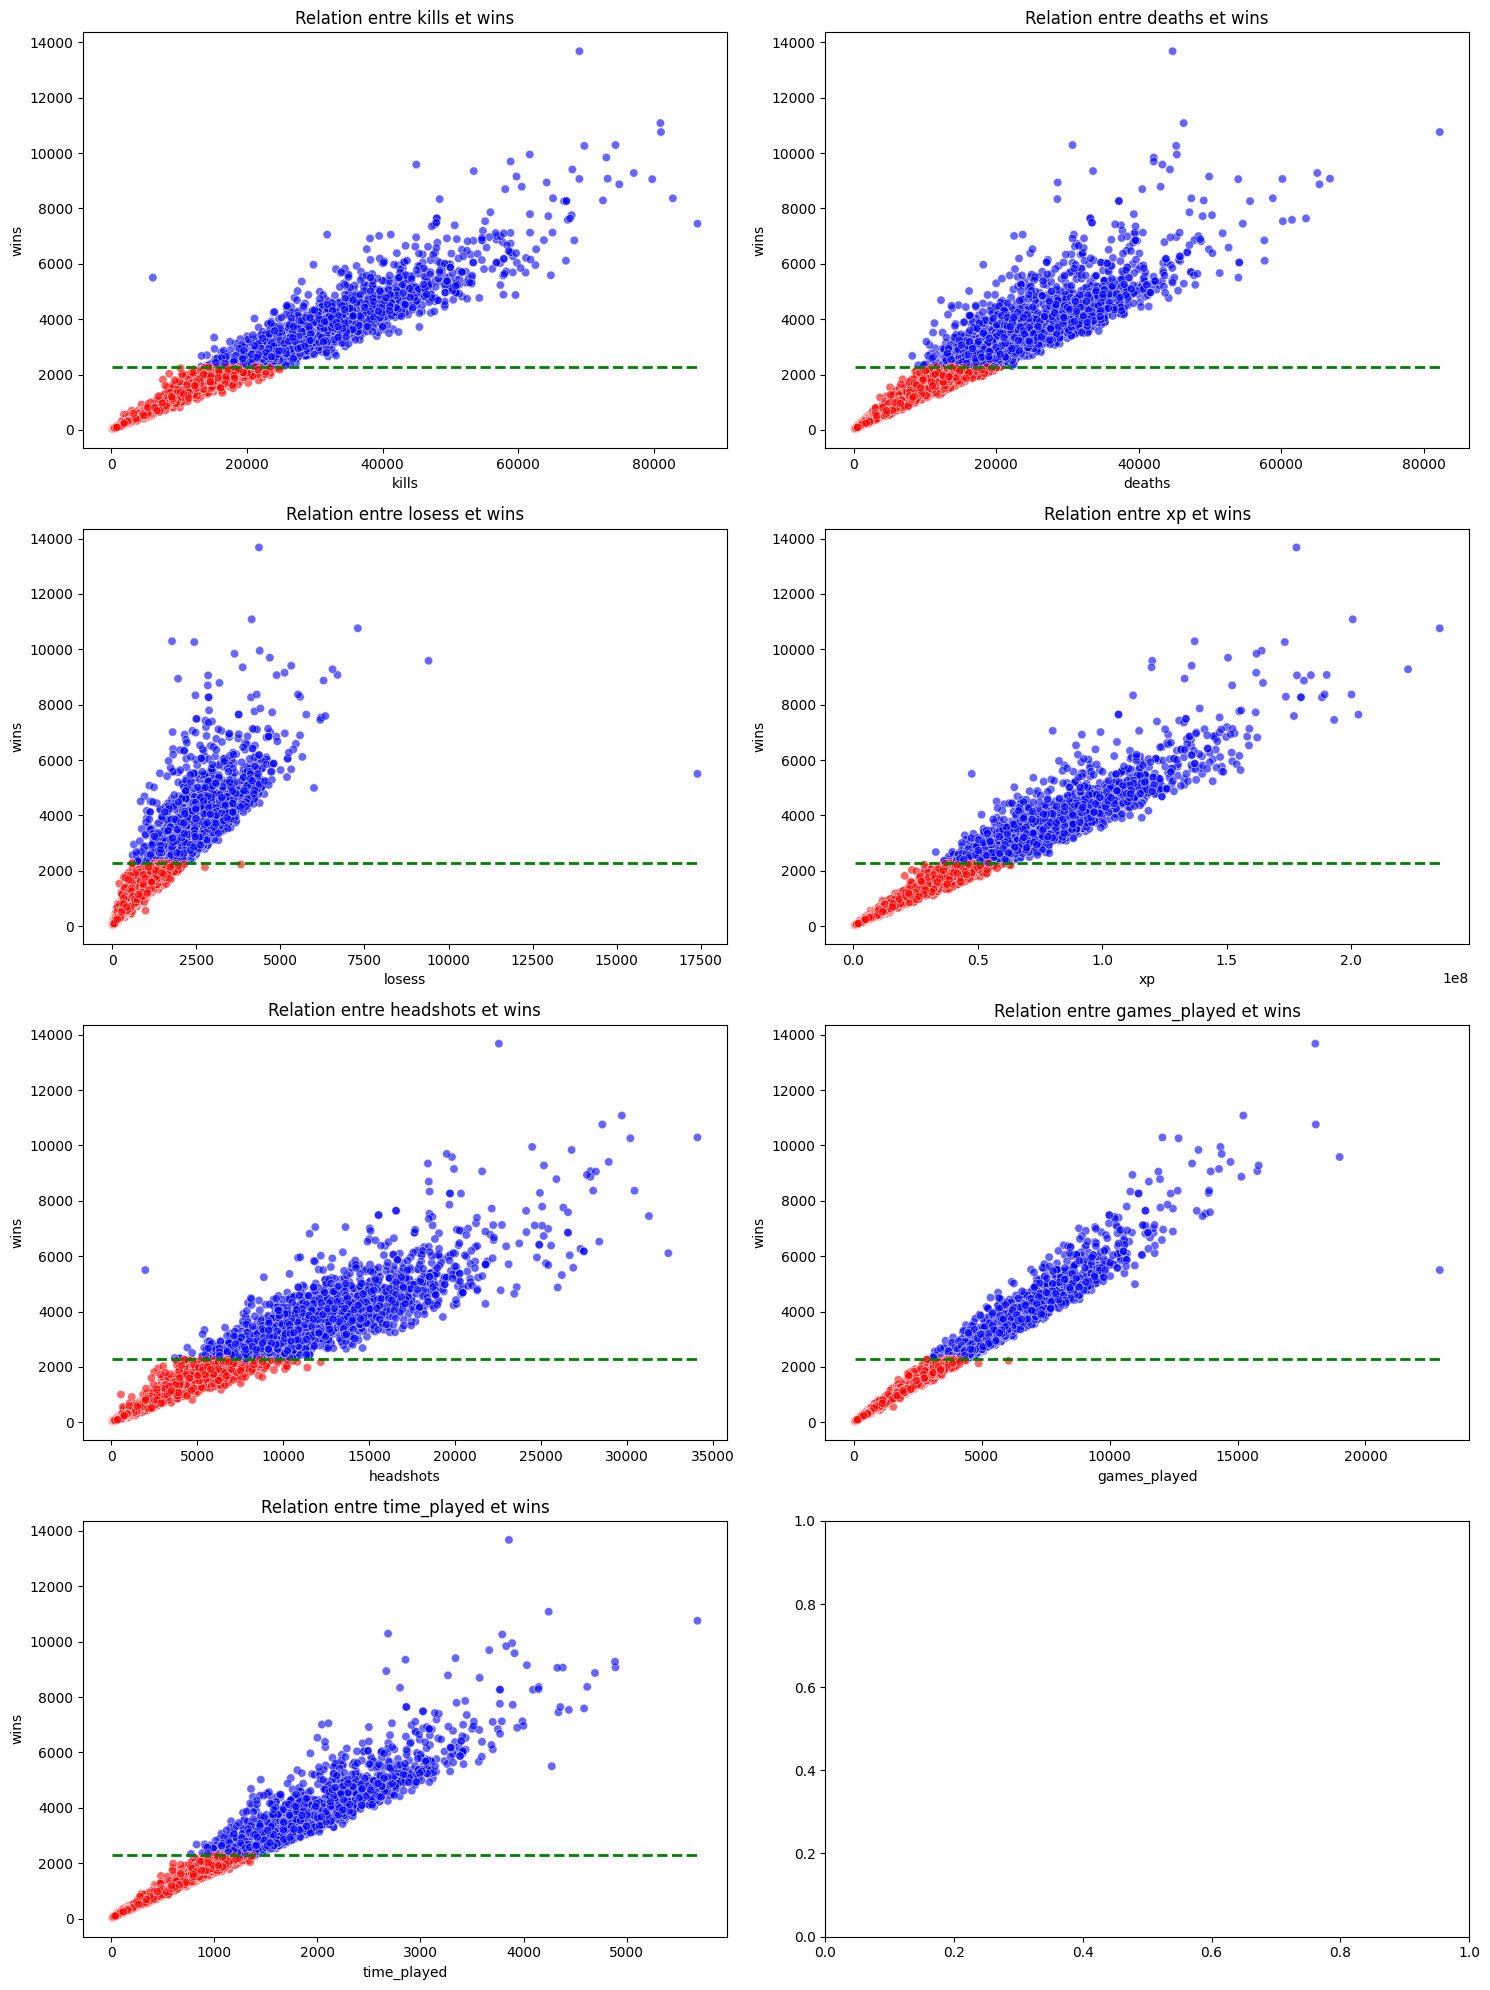

In [15]:



GoodDataTomClancy['median_wins'] = (GoodDataTomClancy['wins'] > mediane_wins).astype(int)

variables = ['kills', 'deaths', 'losess', 'xp', 'headshots', 'games_played', 'time_played']

fig, axes = plt.subplots(4, 2, figsize=(15, 20))
axes = axes.flatten()

for i, var in enumerate(variables):
    sns.scatterplot(x=var, y='wins', hue='median_wins', data=GoodDataTomClancy, ax=axes[i],
                    palette={1: 'blue', 0: 'red'}, alpha=0.6, legend=False)
    
    X = GoodDataTomClancy[[var]]
    y = GoodDataTomClancy['median_wins']
    model = LogisticRegression().fit(X, y)
    
    x_range = np.linspace(X[var].min(), X[var].max(), 200).reshape(-1, 1)
    decision_boundary = model.predict_proba(x_range)[:, 1] >= 0.5
    y_boundary = np.full(x_range.shape, mediane_wins)
    
    axes[i].plot(x_range, y_boundary, color='green', linestyle='--', linewidth=2)
    
    axes[i].set_title(f'Relation entre {var} et wins')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('wins')

plt.tight_layout()
plt.show()


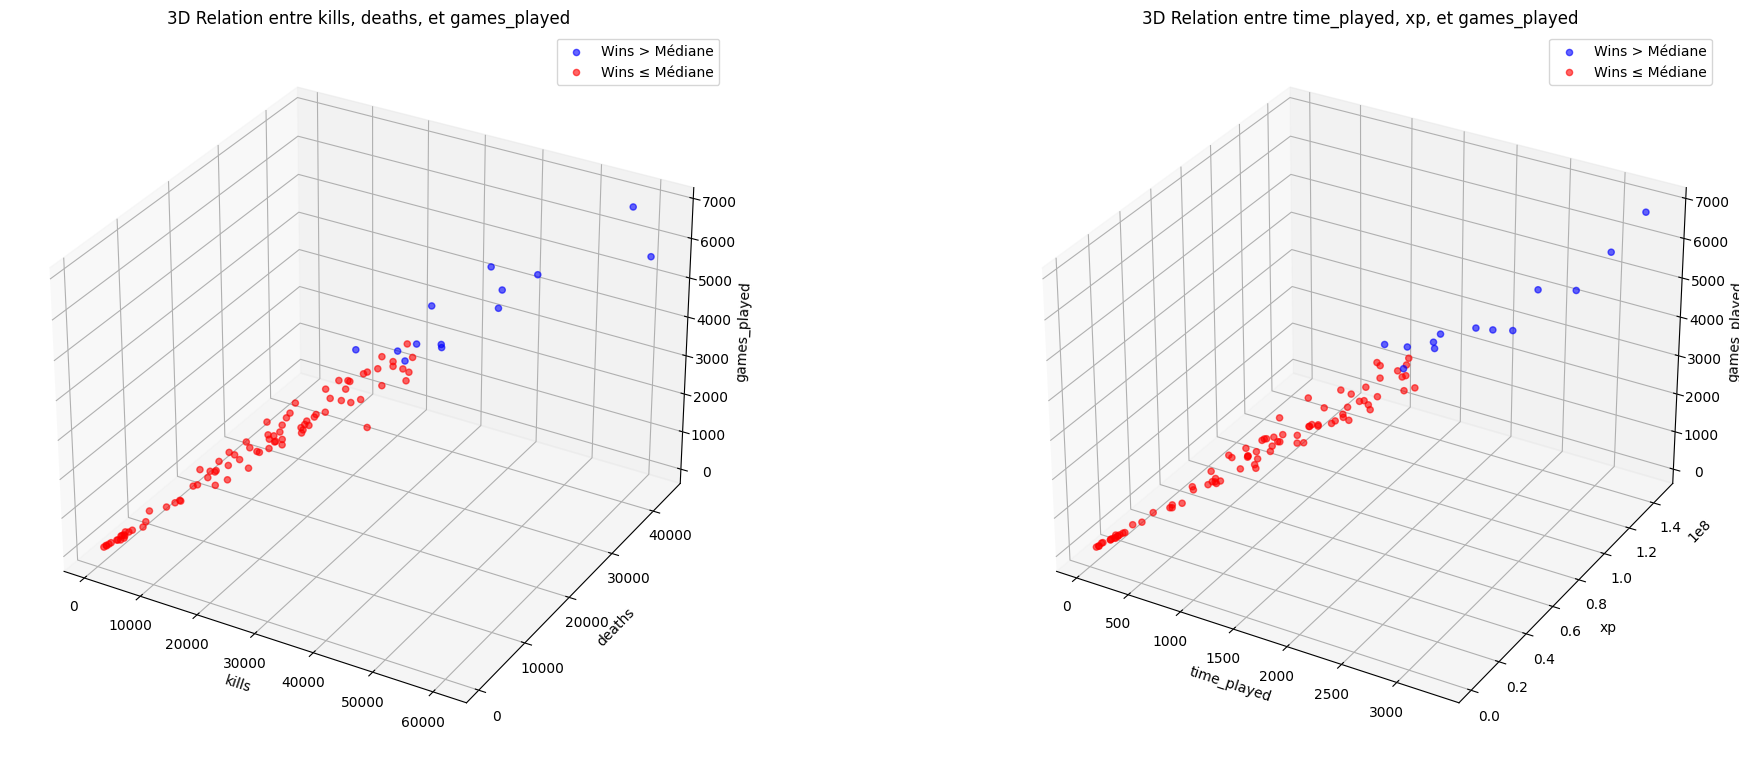

In [16]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import numpy as np

sample_data = GoodDataTomClancy.sample(n=100, random_state=1)
important_pairs = [('kills', 'deaths'), ('time_played', 'xp')]
median_wins = sample_data['games_played'].median()

fig = plt.figure(figsize=(20, 15))

for i, (x_var, y_var) in enumerate(important_pairs):
    ax = fig.add_subplot(2, 2, i + 1, projection='3d')
    
    subset_above = sample_data[sample_data['wins'] > median_wins]
    subset_below = sample_data[sample_data['wins'] <= median_wins]

    ax.scatter(subset_above[x_var], subset_above[y_var], subset_above['wins'], 
               color='blue', alpha=0.6, label='Wins > Médiane')

    ax.scatter(subset_below[x_var], subset_below[y_var], subset_below['wins'], 
               color='red', alpha=0.6, label='Wins ≤ Médiane')

    ax.set_xlabel(x_var)
    ax.set_ylabel(y_var)
    ax.set_zlabel('games_played')
    ax.set_title(f'3D Relation entre {x_var}, {y_var}, et games_played')
    ax.legend()

plt.tight_layout()
plt.show()


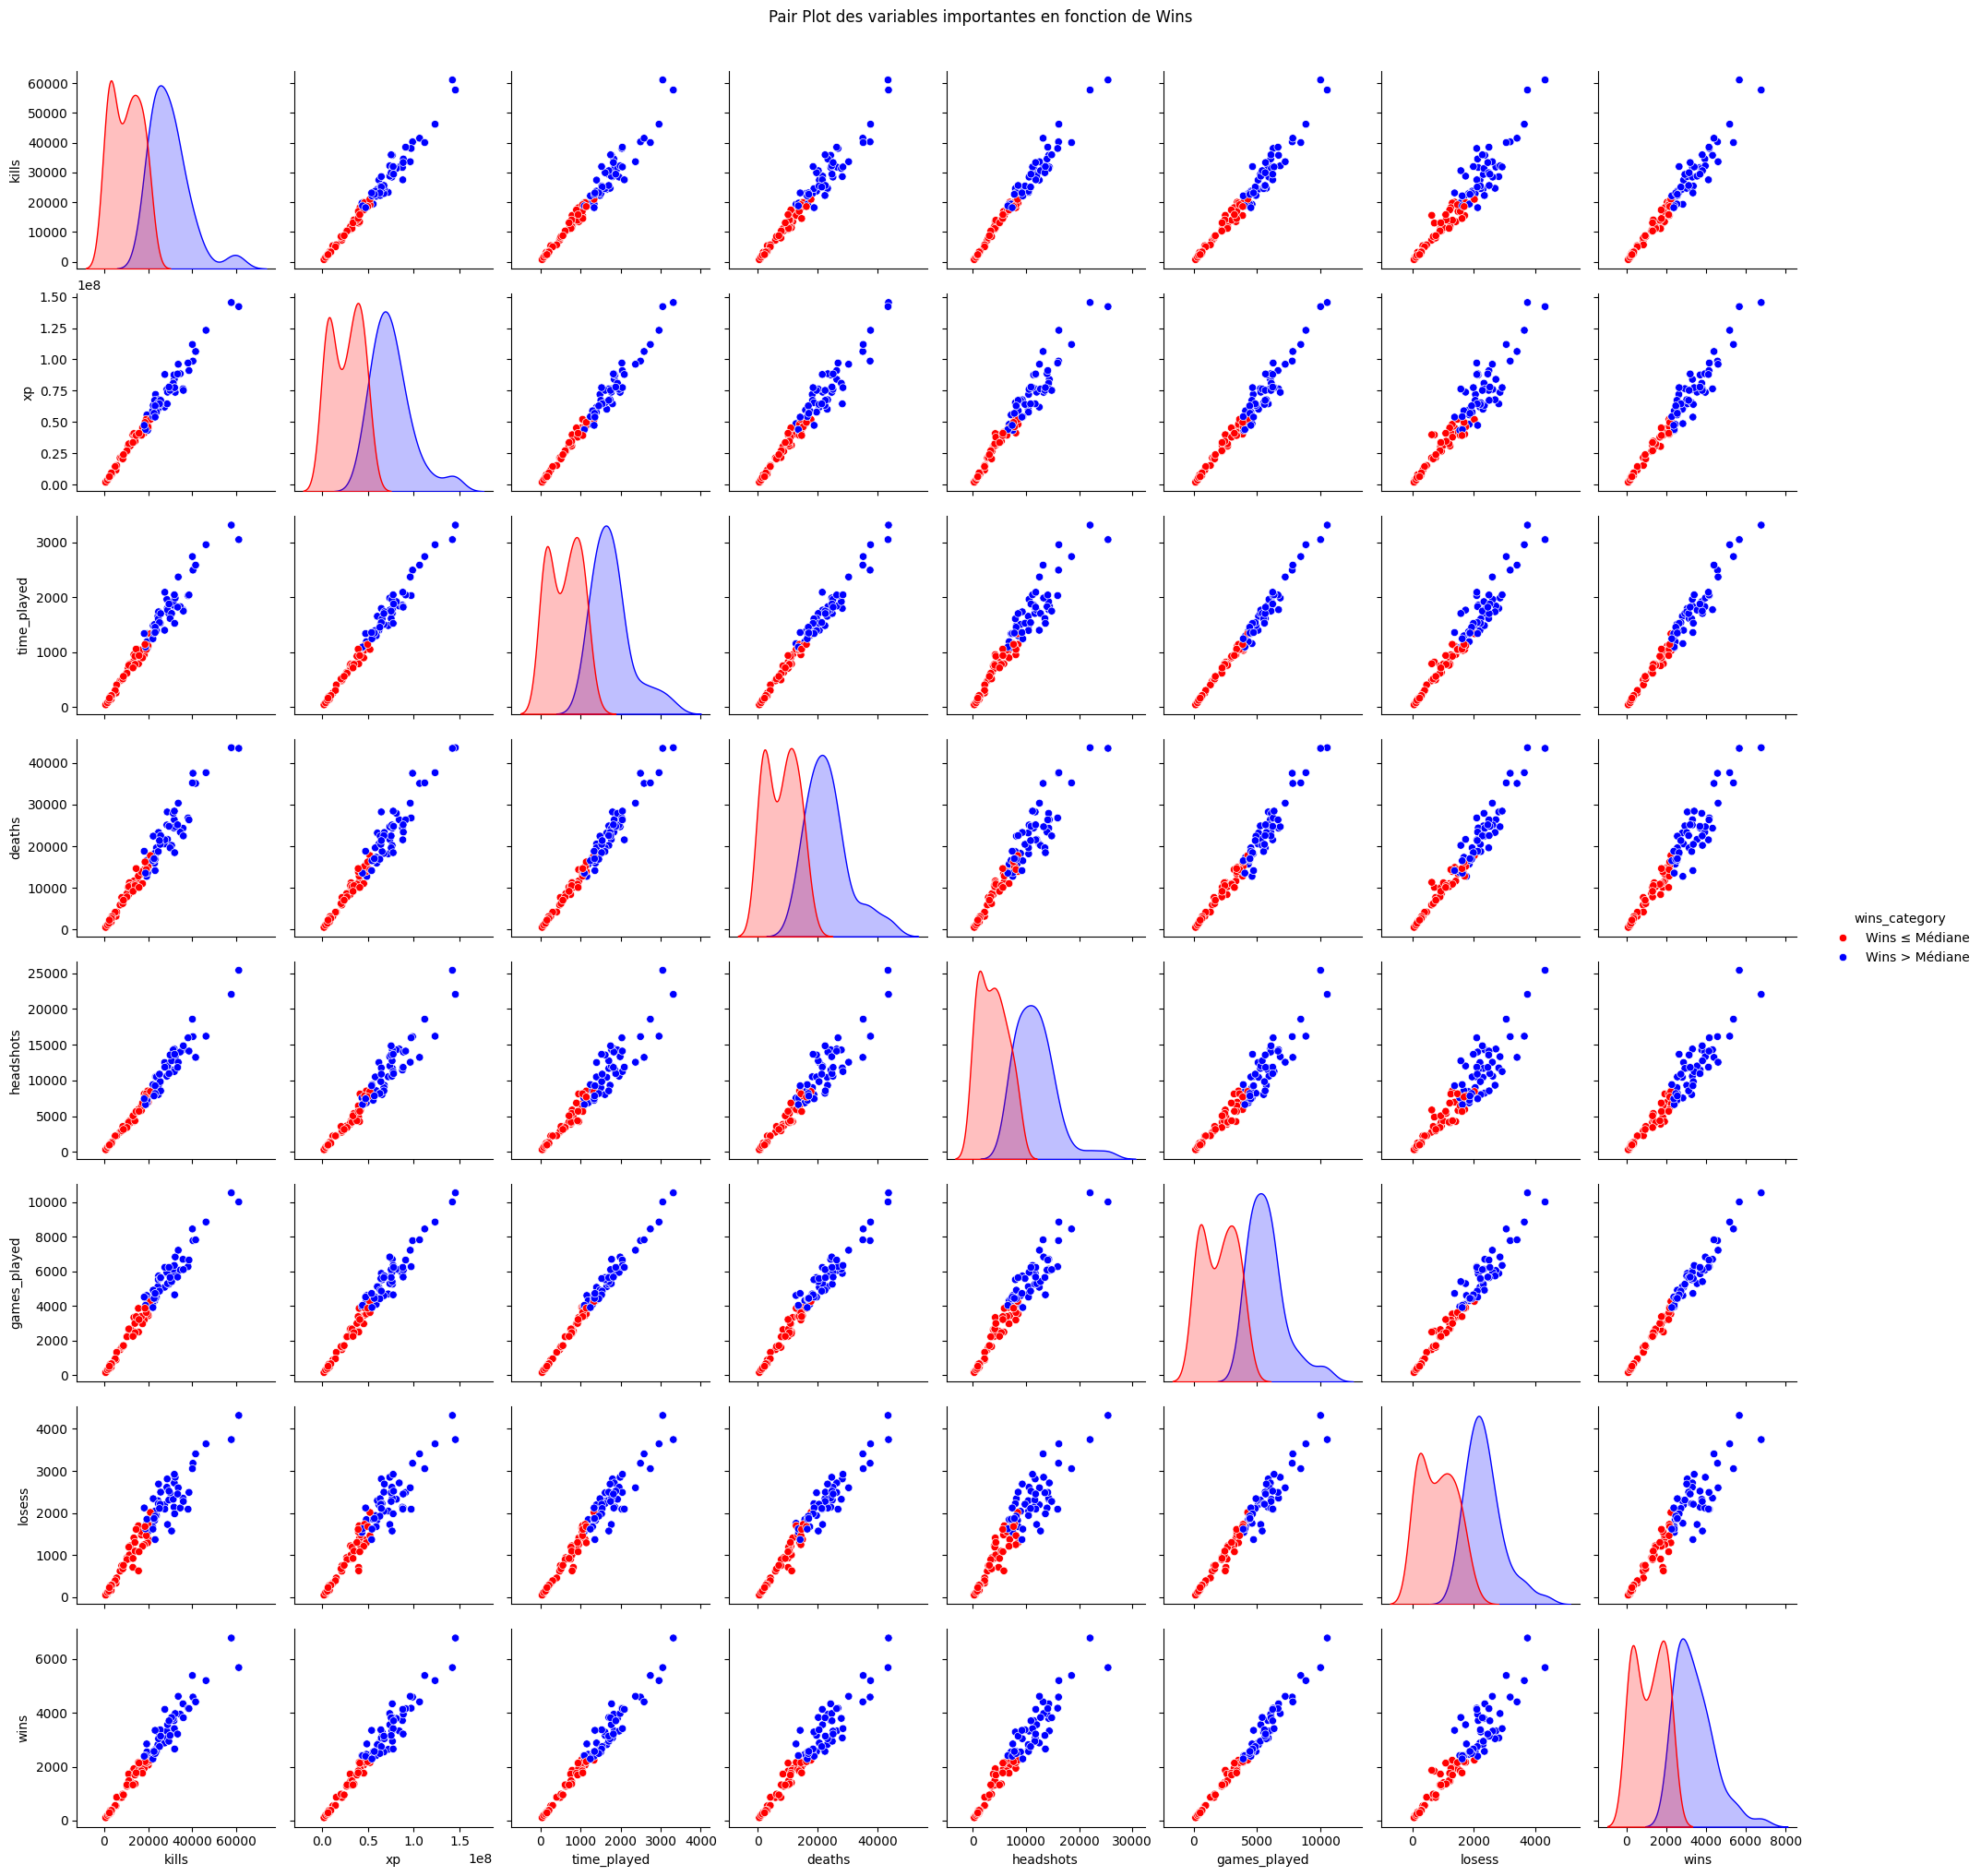

In [17]:


sample_data = GoodDataTomClancy.sample(n=100, random_state=1)
important_vars = ['kills', 'xp', 'time_played', 'deaths', 'headshots', 'games_played', 'losess', 'wins']

sample_data['wins_category'] = np.where(sample_data['wins'] > sample_data['wins'].median(), 'Wins > Médiane', 'Wins ≤ Médiane')

sns.pairplot(sample_data[important_vars + ['wins_category']], hue='wins_category', palette={'Wins > Médiane': 'blue', 'Wins ≤ Médiane': 'red'})
plt.suptitle('Pair Plot des variables importantes en fonction de Wins', y=1.02)
plt.show()


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [19]:



filtered_wins_category_1 = GoodDataTomClancy[GoodDataTomClancy['median_wins'] == 1].head(4)
filtered_wins_category_0 = GoodDataTomClancy[GoodDataTomClancy['median_wins'] == 0].head(4)

print("mediane_wins : ",mediane_wins)



mediane_wins :  2286.0


In [20]:
filtered_wins_category_1

,kills,deaths,losess,xp,headshots,games_played,time_played,wins,median_wins
0,39693,27208,2524,87180363,16789,6487,2105,3963,1
1,52978,31853,2716,111206504,18196,9048,2440,6332,1
2,32141,31353,2892,89109230,12652,7417,2184,4525,1
3,44525,33800,3030,111741958,18692,7753,2481,4723,1


In [21]:
filtered_wins_category_0

,kills,deaths,losess,xp,headshots,games_played,time_played,wins,median_wins
10,4180,3088,184,10658571,1535,727,217,543,0
14,4281,2930,286,9024784,1806,724,235,438,0
15,7026,5503,412,18730457,2332,1310,393,898,0
18,16922,12395,713,42095357,6715,2977,943,2264,0


In [22]:
import numpy as np
random_state_value = np.random.randint(0, 101)
test_final = GoodDataTomClancy.sample(n=10, random_state=random_state_value)
sample_data_GoodDataTomClancy = GoodDataTomClancy.drop(test_final.index)
print("random_state_value :",random_state_value)


random_state_value : 77


In [23]:
test_final

,kills,deaths,losess,xp,headshots,games_played,time_played,wins,median_wins
3287,27441,18173,1918,64515820,10931,5394,1518,3476,1
3433,48161,30983,3423,124000594,20453,8106,2660,4683,1
2552,10178,6642,877,24923547,4138,2186,559,1309,0
822,10300,9079,841,26995239,4100,1923,607,1082,0
4616,11738,12101,1276,32435695,4002,2768,838,1492,0
497,39671,26256,2746,102718794,14433,6605,2050,3859,1
722,28961,26146,2904,87513979,10552,6953,2068,4049,1
291,22855,20222,2053,60455159,8710,5194,1561,3141,1
2262,6598,8488,855,24227553,567,1859,598,1004,0
3865,28613,24594,2793,74733556,10851,6390,1757,3597,1


In [24]:
sample_data_GoodDataTomClancy

,kills,deaths,losess,xp,headshots,games_played,time_played,wins,median_wins
0,39693,27208,2524,87180363,16789,6487,2105,3963,1
1,52978,31853,2716,111206504,18196,9048,2440,6332,1
2,32141,31353,2892,89109230,12652,7417,2184,4525,1
3,44525,33800,3030,111741958,18692,7753,2481,4723,1
4,16972,18249,1965,46063186,5785,4695,1337,2730,1
...,...,...,...,...,...,...,...,...,...
5030,13666,11456,1300,36238617,5610,3313,943,2013,0
5031,18195,15780,1534,45513073,7542,3394,1082,1860,0
5032,1952,1758,145,5002072,760,395,118,250,0
5033,16925,13373,1479,41782162,5803,3395,1039,1916,0


In [25]:
test_final.shape

(10, 9)

In [26]:
sample_data_GoodDataTomClancy.shape

(5025, 9)

In [27]:

X = sample_data_GoodDataTomClancy.drop(columns=['median_wins', 'wins']).apply(pd.to_numeric, errors='coerce')
y = pd.to_numeric(sample_data_GoodDataTomClancy['median_wins'], errors='coerce')

print("Longueur de X :", len(X))
print("Longueur de y :", len(y))


Longueur de X : 5025
Longueur de y : 5025


In [28]:
X.head(2)

,kills,deaths,losess,xp,headshots,games_played,time_played
0,39693,27208,2524,87180363,16789,6487,2105
1,52978,31853,2716,111206504,18196,9048,2440


In [29]:
y.head(2)

0    1
1    1
Name: median_wins, dtype: int32

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
X_train

,kills,deaths,losess,xp,headshots,games_played,time_played
3682,6018,4632,540,15950315,2247,1186,340
3985,15374,12903,1134,42172697,6093,3702,935
150,34833,27515,2565,93389580,13552,5992,1917
1455,558,342,24,1341944,224,100,28
4439,25628,21527,2075,66706339,10498,5008,1609
...,...,...,...,...,...,...,...
4435,6109,4472,512,15011337,1825,1209,359
467,49954,33065,2719,124406138,19616,8703,2681
3098,10816,6596,870,29319051,3586,2169,645
3780,35526,30150,3212,101150787,13418,7597,2433


In [32]:
y_train

3682    0
3985    1
150     1
1455    0
4439    1
       ..
4435    0
467     1
3098    0
3780    1
864     0
Name: median_wins, Length: 4020, dtype: int32

Le modèle d'ensemble a été sauvegardé sous le nom 'ensemble_trees.pkl'.


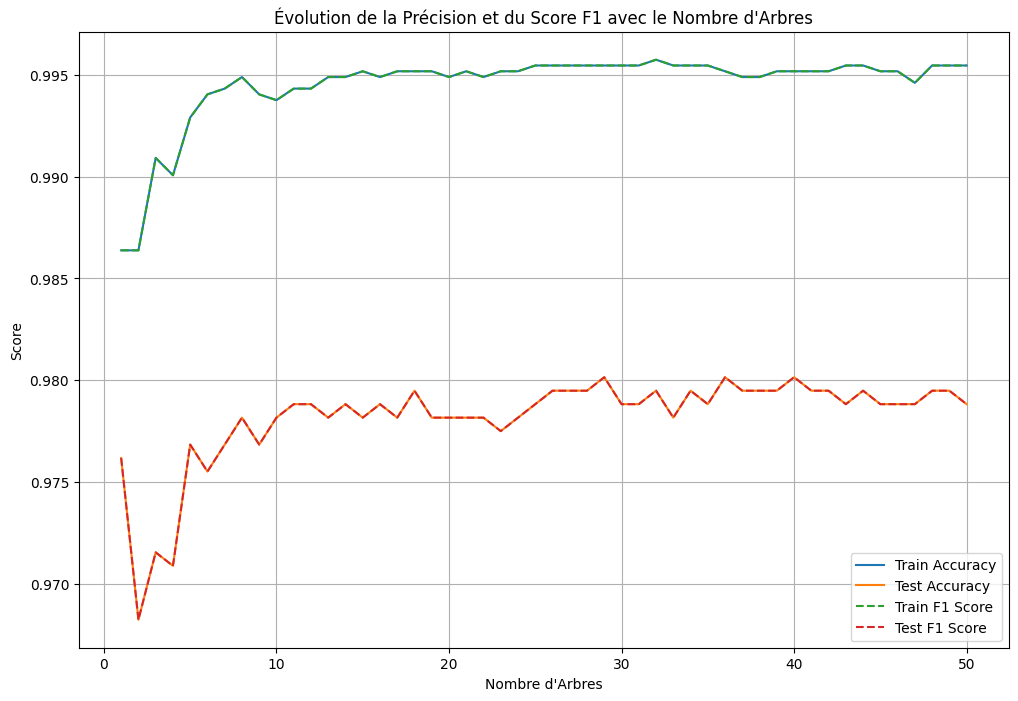

Résultats finaux:
Précision finale sur l'entraînement: 1.00
Précision finale sur le test: 0.98
Score F1 final sur l'entraînement: 1.00
Score F1 final sur le test: 0.98
Précision finale sur le test: 0.98
Rappel final sur le test: 0.98

Matrice de confusion pour l'ensemble de test:
[[743  13]
 [ 19 736]]


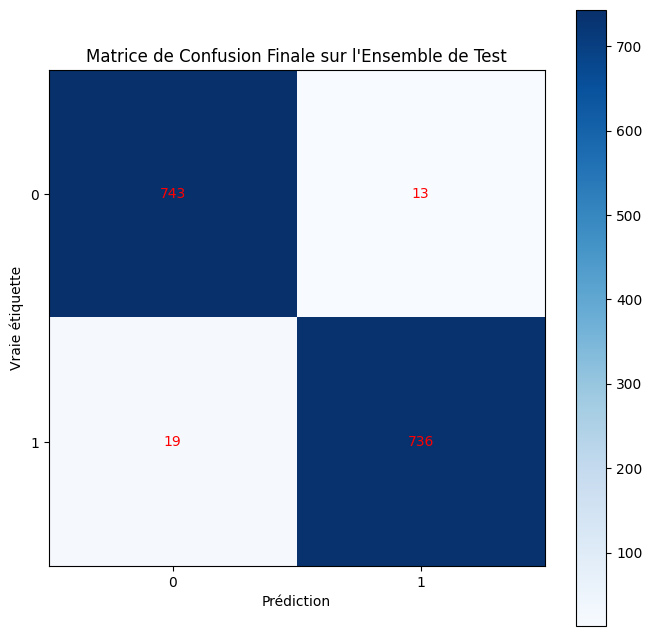

In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, precision_score, recall_score
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from joblib import dump

# Chargement et préparation des données
dataTomClancy = pd.read_csv('./rs6_clean.csv')
colonnes = ['kills', 'deaths', 'losess', 'xp', 'headshots', 'games_played', 'time_played', 'wins']
GoodDataTomClancy = dataTomClancy[colonnes]

# Séparation des caractéristiques et de la cible
X = GoodDataTomClancy[['kills', 'deaths', 'losess', 'xp', 'headshots', 'games_played', 'time_played']]
# Création d'une variable cible binaire basée sur la médiane des 'wins'
y = (GoodDataTomClancy['wins'] > GoodDataTomClancy['wins'].median()).astype(int)

# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

n_estimators = 50
trees = []
train_accuracies = []
test_accuracies = []
train_f1_scores = []
test_f1_scores = []

for i in range(1, n_estimators + 1):
    bootstrap_indices = np.random.choice(np.arange(len(X_train)), size=len(X_train), replace=True)
    X_bootstrap = X_train.iloc[bootstrap_indices]
    y_bootstrap = y_train.iloc[bootstrap_indices]
    
    tree = DecisionTreeClassifier(max_depth=5, random_state=i)
    tree.fit(X_bootstrap, y_bootstrap)
    trees.append(tree)
    
    train_preds = np.array([tree.predict(X_train) for tree in trees])
    test_preds = np.array([tree.predict(X_test) for tree in trees])
    
    train_pred_majority = (np.sum(train_preds, axis=0) >= i / 2).astype(int)
    test_pred_majority = (np.sum(test_preds, axis=0) >= i / 2).astype(int)
    
    train_accuracy = accuracy_score(y_train, train_pred_majority)
    train_f1 = f1_score(y_train, train_pred_majority, average='weighted')
    test_accuracy = accuracy_score(y_test, test_pred_majority)
    test_f1 = f1_score(y_test, test_pred_majority, average='weighted')
    
    train_accuracies.append(train_accuracy)
    train_f1_scores.append(train_f1)
    test_accuracies.append(test_accuracy)
    test_f1_scores.append(test_f1)
    
    if i == n_estimators:
        final_train_predictions = train_pred_majority
        final_test_predictions = test_pred_majority

# Sauvegarde du modèle d'ensemble avec pickle
dump(trees, 'ensemble_trees.joblib')

print("Le modèle d'ensemble a été sauvegardé sous le nom 'ensemble_trees.pkl'.")

# Visualisation de l'évolution des métriques
plt.figure(figsize=(12, 8))
plt.plot(range(1, n_estimators + 1), train_accuracies, label='Train Accuracy')
plt.plot(range(1, n_estimators + 1), test_accuracies, label='Test Accuracy')
plt.plot(range(1, n_estimators + 1), train_f1_scores, label='Train F1 Score', linestyle='--')
plt.plot(range(1, n_estimators + 1), test_f1_scores, label='Test F1 Score', linestyle='--')
plt.xlabel("Nombre d'Arbres")
plt.ylabel("Score")
plt.title("Évolution de la Précision et du Score F1 avec le Nombre d'Arbres")
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Calcul des métriques finales
final_train_accuracy = accuracy_score(y_train, final_train_predictions)
final_test_accuracy = accuracy_score(y_test, final_test_predictions)
final_train_f1 = f1_score(y_train, final_train_predictions, average='weighted')
final_test_f1 = f1_score(y_test, final_test_predictions, average='weighted')
final_precision = precision_score(y_test, final_test_predictions, average='weighted')
final_recall = recall_score(y_test, final_test_predictions, average='weighted')

print("Résultats finaux:")
print(f"Précision finale sur l'entraînement: {final_train_accuracy:.2f}")
print(f"Précision finale sur le test: {final_test_accuracy:.2f}")
print(f"Score F1 final sur l'entraînement: {final_train_f1:.2f}")
print(f"Score F1 final sur le test: {final_test_f1:.2f}")
print(f"Précision finale sur le test: {final_precision:.2f}")
print(f"Rappel final sur le test: {final_recall:.2f}")

# Matrice de confusion
conf_matrix = confusion_matrix(y_test, final_test_predictions)
print("\nMatrice de confusion pour l'ensemble de test:")
print(conf_matrix)

plt.figure(figsize=(8, 8))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Matrice de Confusion Finale sur l'Ensemble de Test")
plt.colorbar()
tick_marks = np.arange(len(np.unique(y_test)))
class_labels = np.unique(y_test)
plt.xticks(tick_marks, labels=class_labels)
plt.yticks(tick_marks, labels=class_labels)
plt.ylabel('Vraie étiquette')
plt.xlabel('Prédiction')
plt.grid(False)

for i in range(len(class_labels)):
    for j in range(len(class_labels)):
        plt.text(j, i, f"{conf_matrix[i, j]}", ha="center", va="center", color="red")

plt.show()


In [34]:
X_final_test = test_final.drop(columns=['median_wins', 'wins'])
y_final_test = test_final['median_wins']

X_final_test = X_final_test[X_train.columns] 

final_predictions = []
for tree in trees:
    pred = tree.predict(X_final_test)
    final_predictions.append(pred)

final_predictions = np.array(final_predictions)

final_pred_majority = (np.sum(final_predictions, axis=0) >= n_estimators / 2).astype(int)

results = pd.DataFrame({
    'Actual': y_final_test.values,
    'Predicted': final_pred_majority
})
results['Result'] = np.where(results['Actual'] == results['Predicted'], '✅', '❌')
results.index = test_final.index 

display(results)



,Actual,Predicted,Result
3287,1,1,✅
3433,1,1,✅
2552,0,0,✅
822,0,0,✅
4616,0,0,✅
497,1,1,✅
722,1,1,✅
291,1,1,✅
2262,0,0,✅
3865,1,1,✅
